In [10]:
import numpy as np
from matplotlib import pyplot as plt

2899
2398
501
2899


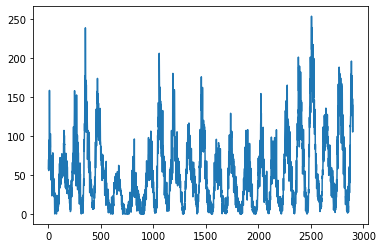

In [17]:
#import dataset

whole_dataset = np.loadtxt("solar_data.csv", delimiter=",")
print(len(whole_dataset))
input_dataset = whole_dataset[:2398]
print(len(input_dataset))
output_dataset = whole_dataset[2398:]
print(len(output_dataset))



t=np.arange(start=0,stop=len(whole_dataset), step=1)
print(len(t))
plt.plot(t,whole_dataset)



In [66]:
input = input_dataset

#Excitatory Neurons         Inhibitory neurons
Ne = 800;                   Ni=200
re = np.random.rand(Ne);    ri = np.random.rand(Ni)


a = np.append(0.02*np.ones(Ne), 0.02+0.08*ri )
b = np.append(0.2*np.ones(Ne), 0.25-0.05*ri )
c = np.append(-65+15*re**2, -65*np.ones(Ni) )
d = np.append(8 - 6*re**2,  2*np.ones(Ni) )

#scaling of input connections
win_e = 5; win_i = 2
U=np.append(win_e * np.ones(Ne),   win_i * np.ones(Ni))


#scaling of recurrent connections
w_e = 0.5; w_i = 1

S = np.hstack((w_e*np.random.rand(10,4),  -w_i*np.random.rand(10,6)))

print(S)


v=-65*np.ones(Ne+Ni)    #Initial values of v
u=b*v                   #Initial values of u
firings=[]; 
states = [];     

[[ 0.05710429  0.03427524  0.17114591  0.40064433 -0.11832704 -0.58973352
  -0.94528167 -0.94182214 -0.26360423 -0.58537597]
 [ 0.18083641  0.48078681  0.16881265  0.20634809 -0.49521725 -0.80183306
  -0.84408044 -0.22024333 -0.56790405 -0.43608683]
 [ 0.47834279  0.27015602  0.12327843  0.1186584  -0.75066935 -0.18457587
  -0.59186066 -0.91741829 -0.15526044 -0.76017819]
 [ 0.2886799   0.15535864  0.30654759  0.04092471 -0.32560555 -0.36006015
  -0.11694291 -0.58956045 -0.02737164 -0.31994099]
 [ 0.26244815  0.48152316  0.00332487  0.19816203 -0.08873481 -0.06299657
  -0.92602174 -0.92026888 -0.86235447 -0.30528753]
 [ 0.28269217  0.08926972  0.49135556  0.3766287  -0.11636255 -0.36428746
  -0.06557189 -0.85437552 -0.50556087 -0.91387982]
 [ 0.16019791  0.01866248  0.02626016  0.2232373  -0.6935768  -0.5683789
  -0.7504483  -0.52548872 -0.45008874 -0.32551207]
 [ 0.01503119  0.42443251  0.40598991  0.10646694 -0.33342258 -0.75991726
  -0.25652519 -0.021727   -0.5793287  -0.82304903]
 

In [48]:

v=-65*ones(Ne+Ni,1);    #Initial values of v
u=b.*v;                 #Initial values of u
firings=[];             #spike timings

states = []; %here we construct the matrix of reservoir states

for t=1:size(input,2)            #simulation of 1000 ms
  %we don't need random thalamic input:
  %I=[5*randn(Ne,1);2*randn(Ni,1)]; #thalamic input
  %we use instead the input from the external time series!
  I=input(t) * U;
  fired=find(v>=30);    #indices of spikes
  firings=[firings; t+0*fired,fired];
  v(fired)=c(fired);
  u(fired)=u(fired)+d(fired);
  
  I=I+sum(S(:,fired),2); 
  v=v+0.5*(0.04*v.^2+5*v+140-u+I); #step 0.5 ms
  v=v+0.5*(0.04*v.^2+5*v+140-u+I); #for numerical
  u=u+a.*(b.*v-u);                 #stability
  
  states = [states (v>=30)]; 
  
end
plot(firings(:,1),firings(:,2),'.');

#in the end states is 1000 x number of time steps

SyntaxError: invalid syntax (3133481168.py, line 5)